In [2]:
import pandas as pd

df = pd.read_csv("../data/data.csv")

df.head()


,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


## KPI Definitions

Primary KPI:
- Average Yearly Amount Spent

Supporting KPIs:
- Spending by membership length
- Spending by time on app vs website
- Correlation between engagement and spending



In [5]:
avg_spent = df['Yearly Amount Spent'].mean()
print(avg_spent)


499.31424


In [6]:
df.groupby(pd.cut(df['Length of Membership'], bins=5))['Yearly Amount Spent'].mean()


C:\Users\Erman Esen\AppData\Local\Temp\ipykernel_16404\3414372149.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['Length of Membership'], bins=5))['Yearly Amount Spent'].mean()


Length of Membership
(0.263, 1.6]    349.910526
(1.6, 2.93]     431.167664
(2.93, 4.26]    503.235263
(4.26, 5.59]    574.586700
(5.59, 6.92]    694.328750
Name: Yearly Amount Spent, dtype: float64

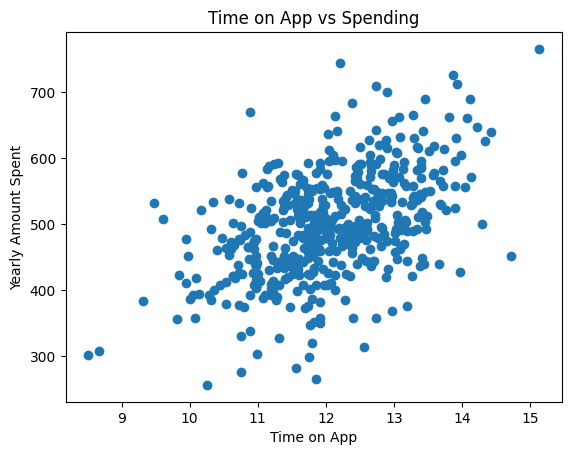

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['Time on App'], df['Yearly Amount Spent'])
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.title('Time on App vs Spending')
plt.show()


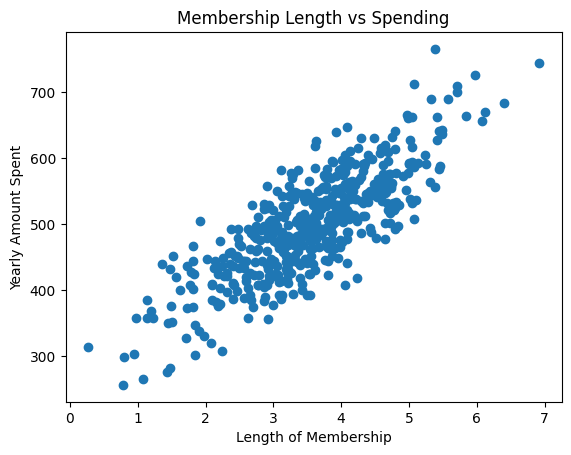

In [8]:
plt.scatter(df['Length of Membership'], df['Yearly Amount Spent'])
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.title('Membership Length vs Spending')
plt.show()


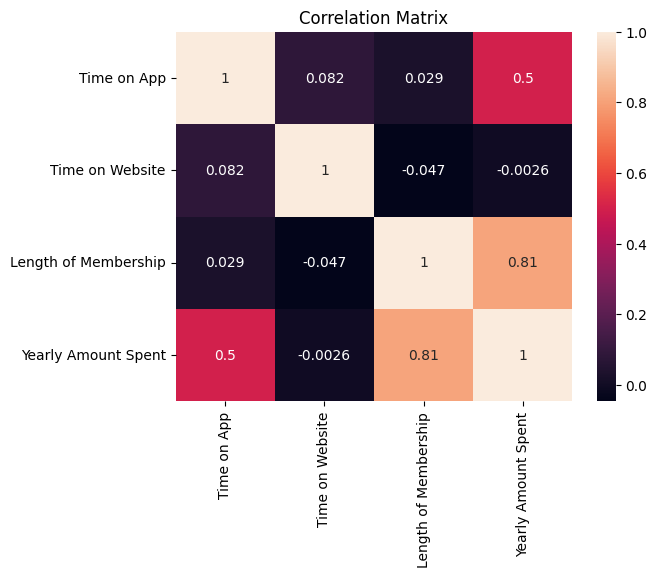

In [10]:
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import duckdb

con = duckdb.connect("analytics.duckdb")  

con.execute("""
CREATE TABLE customers AS
SELECT *
FROM read_csv_auto('../data/data.csv');
""")

con.execute("SELECT COUNT(*) FROM customers").fetchall()


[(500,)]

# Load dataset into DuckDB to simulate SQL-based analytics workflow
